<a href="https://colab.research.google.com/github/MUKESH-SK/Quantitative-Analysis-and-Finance/blob/main/Technical_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading Dataset**

In [ ]:
dataset = pd.read_csv(r"/content/quant_analysis_dataset.csv") 
#printing the dataset
print(dataset)

           Date      Open      High       Low     Close  Adj Close  Volume
0    2022-01-01  0.079536  0.079056  0.079520  0.079051   0.079051  205008
1    2022-01-02  0.079043  0.080145  0.079351  0.080886   0.080886  208711
2    2022-01-03  0.080885  0.081274  0.080666  0.080963   0.080963  260036
3    2022-01-04  0.080962  0.081830  0.080832  0.082664   0.082664  305701
4    2022-01-05  0.082668  0.081933  0.080739  0.081489   0.081489  414546
..          ...       ...       ...       ...       ...        ...     ...
361  2022-12-28  0.072544  0.072498  0.071846  0.071891   0.071891  301565
362  2022-12-29  0.071893  0.072335  0.071976  0.072201   0.072201  248296
363  2022-12-30  0.072200  0.072226  0.072340  0.072232   0.072232  244279
364  2022-12-31  0.072239  0.072503  0.072164  0.072323   0.072323  182415
365  2023-01-01  0.072320  0.072381  0.072163  0.072238   0.072238  144341

[366 rows x 7 columns]


# **Function for Calculating Simple Moving Averages (SMA)**





period: the number of data points to include in the EMA calculation data: DataFrame containing the data to calculate the EMA



In [ ]:
def simple_moving_average(data, period):
    return data.rolling(window=period).mean()


rolling().mean() function is used to calculate the mean of the each datapoints with period-1 previous datapoints for each datapoints in dataframe

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361    0.072590
362    0.072488
363    0.072414
364    0.072337
365    0.072258
Name: Close, Length: 366, dtype: float64


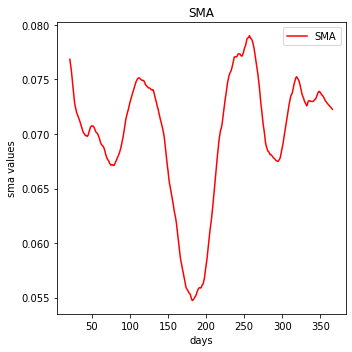

In [ ]:
# Example usage:
#calling simple_moving_average() function
period = 21
sma = simple_moving_average(dataset['Close'], period)
print(sma)
# creating list x of size = total number of days

x = []
for i in range(0,366):
    x.append(i+1)

# plotting ema 
plt.title("SMA")
plt.rcParams["figure.figsize"] = [5, 5]
plt.xlabel("days")
plt.ylabel("sma values")
plt.plot(x, sma, color="red")
plt.legend(["SMA"])
plt.show()

# **Function for Calculating Exponential Moving Averages (EMA)**

The function calculates the EMA using a loop, starting from the first data point and updating the EMA using the formula:
EMA = α * current_price + (1 - α) * previous_EMA
where α = 2 / (period + 1) ,α is called as smoothing factor for the EMA calculation

The below function returns a list containing the EMA values for each data point. 

In [ ]:
def EMA(data, period):
    alpha = 2/(period+1)
    # Calculate the EMA using the pandas rolling function
    ema = data.rolling(window=period).mean()
    # Add a weight factor to the EMA calculation
    ema = ema * (alpha) + data * (1-(alpha))
    return ema

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361    0.071892
362    0.072154
363    0.072200
364    0.072294
365    0.072235
Name: Close, Length: 366, dtype: float64


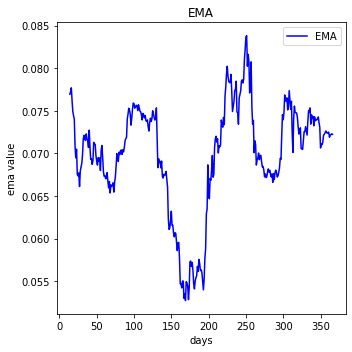

In [ ]:
#data = pd.read_csv('dataset.csv')  # Replace with the path to your dataset
period = 14  # The number of data points to include in the EMA calculation
ema = EMA(dataset['Close'], period)
print(ema)
# creating list x of size = total number of days 
x = []
for i in range(0,366):
    x.append(i+1)
# plotting ema 
plt.title("EMA")
plt.rcParams["figure.figsize"] = [5, 3.50]
plt.xlabel("days")
plt.ylabel("ema value")
plt.plot(x, ema, color="blue")
plt.legend(["EMA"])
plt.show()

#  **Function for calculating Relative Strength Index (RSI)**

In [ ]:
def Calculate_RSI(data, period):
    # Create a new dataframe with the difference between consecutive close prices
    delta = data.diff()
    # Create a new dataframe with the gains
    gain = delta.where(delta > 0, 0)
    # Create a new dataframe with the losses
    loss = -delta.where(delta < 0, 0)
    # avg_gain is df which contain the mean of datapoints(period) from gain df
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()
    # rs stores the ratio of average gain or loss
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rs,rsi

Creating a new variable "gain" which is assigned the values of the "delta" dataframe where the values of "delta" are greater than 0. Where delta is less than or equal to 0, gain will be assigned a value of 0,

Similarly for loss, The negative sign in front of "delta" is used to make sure that all values assigned to "loss" are positive, even though they represent a loss.

(0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361    0.626399
362    0.805160
363    3.117405
364    2.626159
365    2.529762
Name: Close, Length: 366, dtype: float64, 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
361    38.514482
362    44.603245
363    75.712856
364    72.422607
365    71.669477
Name: Close, Length: 366, dtype: float64)


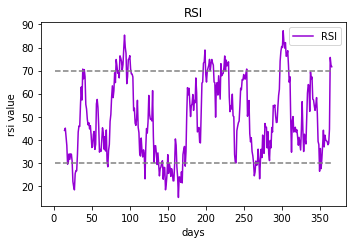

In [ ]:
period = 14  # The number of data points to include in the EMA calculation
data = dataset['Close']
RSI = Calculate_RSI(data, period)
print(RSI)
    
#     creating list x of size = total number of days 
x = []
y1 = []
y2 = []
for i in range(0,366):
    x.append(i+1)
    y1.append(30)
    y2.append(70)
# y1 and y2 represents a constant straight line of value 30,70

#      plotting rsi 
plt.title("RSI")
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True
plt.xlabel("days")
plt.ylabel("rsi value")
plt.plot(x, RSI[1], color="darkviolet")
plt.plot(x, y1, color="grey", linestyle='dashed')
plt.plot(x, y2, color="grey", linestyle='dashed')
plt.legend(["RSI"])
plt.show()


In [ ]:
# rsi variable stores the RSI values derived from Calculate_RSI()
rsi = RSI[1]
print(rsi)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
361    38.514482
362    44.603245
363    75.712856
364    72.422607
365    71.669477
Name: Close, Length: 366, dtype: float64


In [ ]:
period = 14  # The number of data points to include in the RSI calculation
data = dataset['Close']
# RSI = np.array(Calculate_RSI(data, period))
RSI = Calculate_RSI(data, period)
#gain_to_lose stores avg_gain to avg_loss ratio
gain_to_lose =RSI[0]
# converting pandas series to numpy array
gain_to_lose_np =np.array(RSI[0])
print(gain_to_lose)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361    0.626399
362    0.805160
363    3.117405
364    2.626159
365    2.529762
Name: Close, Length: 366, dtype: float64


# **Function for Calculating Moving Average Convergence/Divergence (MACD)**



In [ ]:
def macd(data, short_window, long_window, signal_window):
  # using ema function which is defined previously for calculating ema_short,ema_long
    ema_short = EMA(data, short_window)
    ema_long =  EMA(data, long_window)
    #applying the formula for finding macd,signal,histogram
    macd = ema_short - ema_long
    signal = macd.rolling(window=signal_window).mean()
    histogram = macd - signal
    return macd,signal,histogram

[[            nan             nan             nan ... -3.96410256e-05
  -2.48732194e-05 -9.19658120e-06]
 [            nan             nan             nan ... -1.00044160e-04
  -9.44287749e-05 -8.29794239e-05]
 [            nan             nan             nan ...  6.04031339e-05
   6.95555556e-05  7.37828427e-05]]


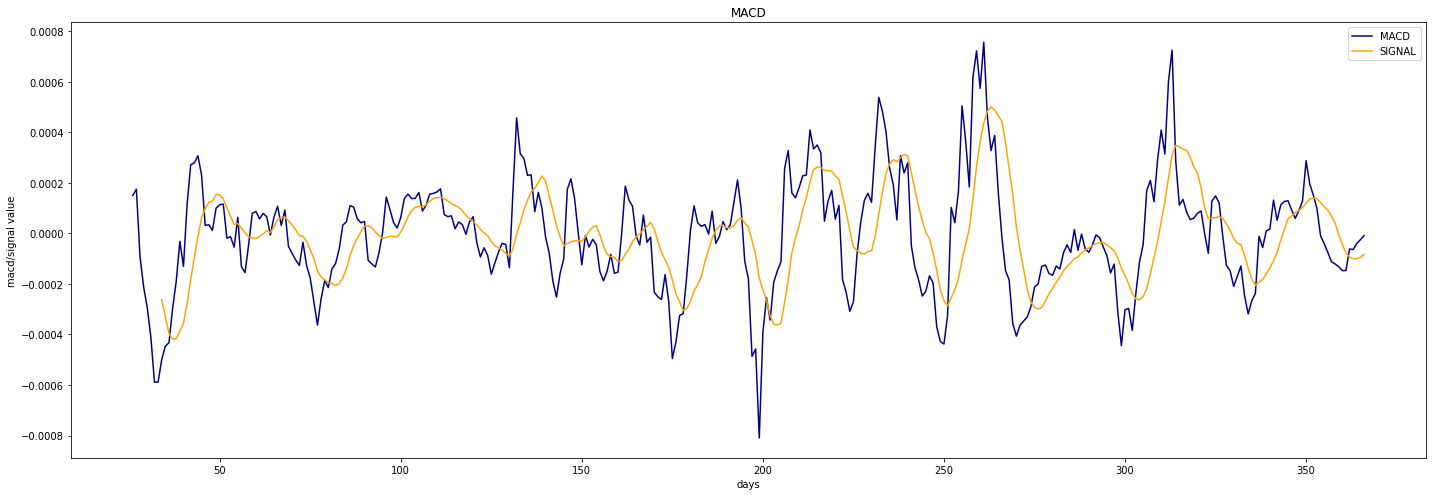

In [ ]:
# Example usage:
macd_values = np.array(macd(dataset['Close'], 26, 12, 9))
print(macd_values)
    
#     creating list x of size = total number of days 
x = []
for i in range(0,366):
    x.append(i+1)

#      plotting macd
plt.title("MACD")
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True
plt.xlabel("days")
plt.ylabel("macd/signal value")
plt.plot(x, macd_values[0], color="darkblue")
plt.plot(x, macd_values[1], color="orange")
plt.legend(["MACD","SIGNAL"])
plt.show()


# **Function for Calculating Average True Range (ATR)**




In [ ]:
def calculate_atr(data, n):
    #creating df 'H-L' for storing absolute value of High - Low
    data['H-L'] = abs(data['High'] - data['Low'])
    #creating df 'H-PC' for storing absolute value of High - previous close
    data['H-PC'] = abs(data['High'] - data['Close'].shift(1))
    data['L-PC'] = abs(data['Low'] - data['Close'].shift(1))
    #creating df 'TR'(TRUE RANGE) for maximum of 'H-L', 'H-PC', 'L-PC'
    data['TR'] = data[['H-L', 'H-PC', 'L-PC']].max(axis=1)
    data['ATR'] = data['TR'].rolling(n).mean()
    return data['ATR']

df.shift(1) functions shifts the series 1 step forward

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361    0.000761
362    0.000749
363    0.000541
364    0.000520
365    0.000486
Name: ATR, Length: 366, dtype: float64


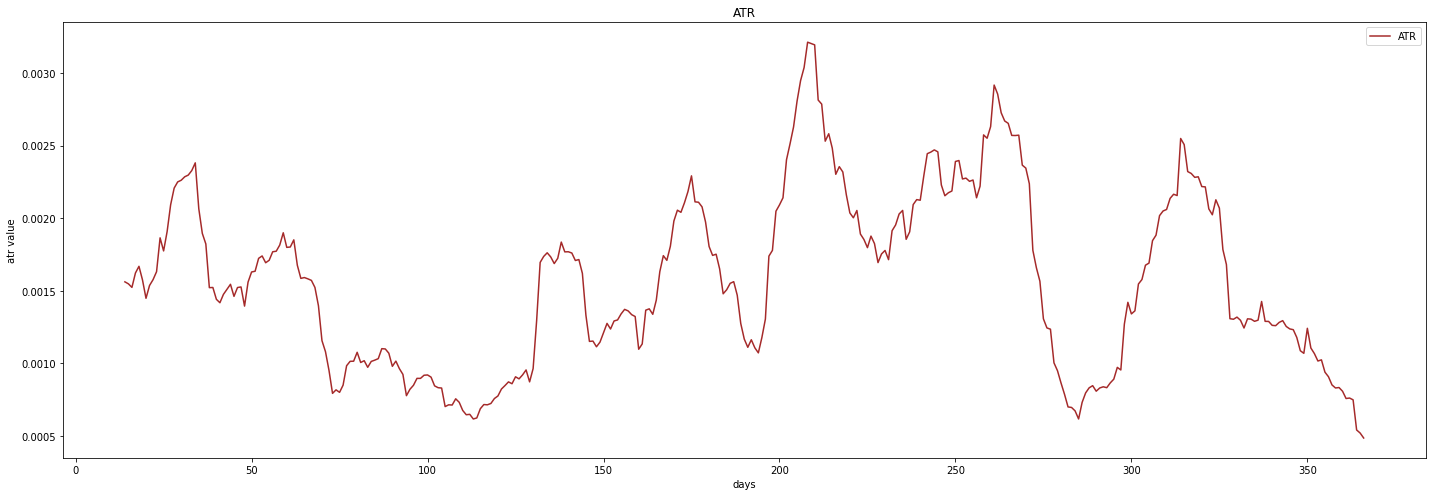

In [ ]:
# Example usage:
atr = calculate_atr(dataset, 14)
print(atr)
# creating list x of size = total number of days 
x = []
for i in range(0,366):
    x.append(i+1)
# plotting atr
plt.title("ATR")
plt.rcParams["figure.figsize"] = [5, 3.50]
plt.xlabel("days")
plt.ylabel("atr value")
plt.plot(x, atr, color="brown")
plt.legend(["ATR"])
plt.show()

In [ ]:
# ATR_short  variable contains atr for period 7
ATR_short = np.array(calculate_atr(dataset, 7))
ATR_short1 = calculate_atr(dataset, 7)
print(ATR_short1)
# ATR_long  variable contains atr for period 21
ATR_long = np.array(calculate_atr(dataset, 21))
ATR_long1 = calculate_atr(dataset, 21)
print(ATR_long1)
# atr_ratio  variable contains ratio of ATR_short and ATR_long
atr_ratio_np =np.divide(ATR_short,ATR_long)
atr_ratio = pd.Series(atr_ratio_np)
print(atr_ratio)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361    0.000595
362    0.000487
363    0.000478
364    0.000475
365    0.000400
Name: ATR, Length: 366, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361    0.000825
362    0.000768
363    0.000727
364    0.000712
365    0.000689
Name: ATR, Length: 366, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361    0.721725
362    0.634164
363    0.657410
364    0.667358
365    0.580598
Length: 366, dtype: float64


# **Function for Calculating Finance Club Indicator(FCI)**


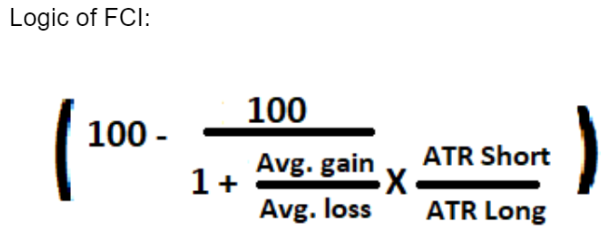

**FCI = (Finance Club Signal).mean(days) - RSI.mean(days)**

In [ ]:
def Calculate_FCI(period):
  # multiplying gain_to_lose_np,atr_ratio_np
  multiply_deno= np.multiply(gain_to_lose_np,atr_ratio_np)
  fci_signal_np = 100-np.divide(100,(1+multiply_deno))
  # converting numpy fci_signal_np array to fci_signal series 
  fci_signal = pd.Series(fci_signal_np)
  # calculating fci_signal mean and storing in fci_mean
  fci_mean = fci_signal.rolling(window = period).mean()
  # calculating rsi mean and storing in rsi_mean
  rsi_mean = RSI[1].rolling(window = period).mean()
  # Applying the formula
  FCI = fci_mean - rsi_mean
  return FCI



0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
361    -6.951392
362    -7.776072
363    -8.353113
364    -8.961546
365   -10.091581
Length: 366, dtype: float64


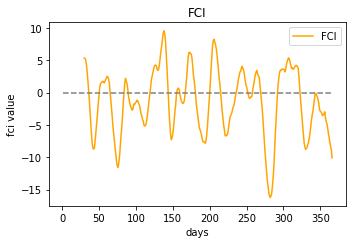

In [ ]:
period = 10
fci = Calculate_FCI(period)
print(fci)
# creating list x of size = total number of days 
x = []
y = []
for i in range(0,366):
    x.append(i+1)
    y.append(0)
# plotting atr
plt.title("FCI")
plt.rcParams["figure.figsize"] = [5, 3.50]
plt.xlabel("days")
plt.ylabel("fci value")
plt.legend(["FCI"])
plt.plot(x, fci, color="orange")
plt.legend(["FCI"])
plt.plot(x, y, color="grey",linestyle='dashed')
plt.show()